In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/usedcar.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [103]:
#dataset
df=pd.read_csv('/content/cardekho_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [117]:
car_name1=[]
Fuel_Type=[]
Transmission=[]
for i in df['Car_Name']:
  if i not in car_name1:
    car_name1.append(i)
for i in df['Fuel_Type']:
  if i not in Fuel_Type:
    Fuel_Type.append(i)
for i in df['Transmission']:
  if i not in Transmission:
    Transmission.append(i)
print(car_name1,'\n',Fuel_Type,'\n',Transmission)

['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd', 'camry', 'land cruiser', 'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ', 'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350', 'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200', 'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ', 'Honda Dream Yug

In [4]:
df['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


In [5]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Car_Name','Fuel_Type', 'Transmission', 'Owner_Type']

# Apply LabelEncoder to each column
for column in columns_to_encode:
  if column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


print(df.head())

   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

  Seller_Type  Transmission  Owner  
0      Dealer             1      0  
1      Dealer             1      0  
2      Dealer             1      0  
3      Dealer             1      0  
4      Dealer             1      0  


In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,Dealer,1,0
1,93,2013,4.75,9.54,43000,1,Dealer,1,0
2,68,2017,7.25,9.85,6900,2,Dealer,1,0
3,96,2011,2.85,4.15,5200,2,Dealer,1,0
4,92,2014,4.60,6.87,42450,1,Dealer,1,0


In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [10]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [11]:
new=df.drop(columns=['Seller_Type','Owner', 'Present_Price'])

In [12]:
new.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Transmission
0,90,2014,3.35,27000,2,1
1,93,2013,4.75,43000,1,1
2,68,2017,7.25,6900,2,1
3,96,2011,2.85,5200,2,1
4,92,2014,4.60,42450,1,1


In [119]:
car_name2=[]
Fuel_Type2=[]
Transmission2=[]
for i in new['Car_Name']:
  if i not in car_name2:
    car_name2.append(i)
for i in new['Fuel_Type']:
  if i not in Fuel_Type2:
    Fuel_Type2.append(i)
for i in new['Transmission']:
  if i not in Transmission2:
    Transmission2.append(i)
print(car_name2,'\n',Fuel_Type2,'\n',Transmission2)

[90, 93, 68, 96, 92, 95, 91, 62, 76, 73, 63, 85, 0, 65, 89, 81, 86, 71, 77, 78, 80, 70, 79, 67, 88, 49, 56, 42, 11, 46, 43, 40, 48, 41, 44, 17, 45, 47, 6, 4, 32, 60, 58, 51, 14, 37, 20, 7, 5, 57, 12, 15, 52, 26, 16, 61, 31, 54, 38, 8, 28, 1, 25, 34, 59, 13, 2, 35, 22, 39, 30, 53, 23, 27, 33, 9, 50, 55, 36, 21, 29, 10, 24, 19, 18, 3, 84, 82, 83, 75, 97, 74, 72, 94, 69, 66, 64, 87] 
 [2, 1, 0] 
 [1, 0]


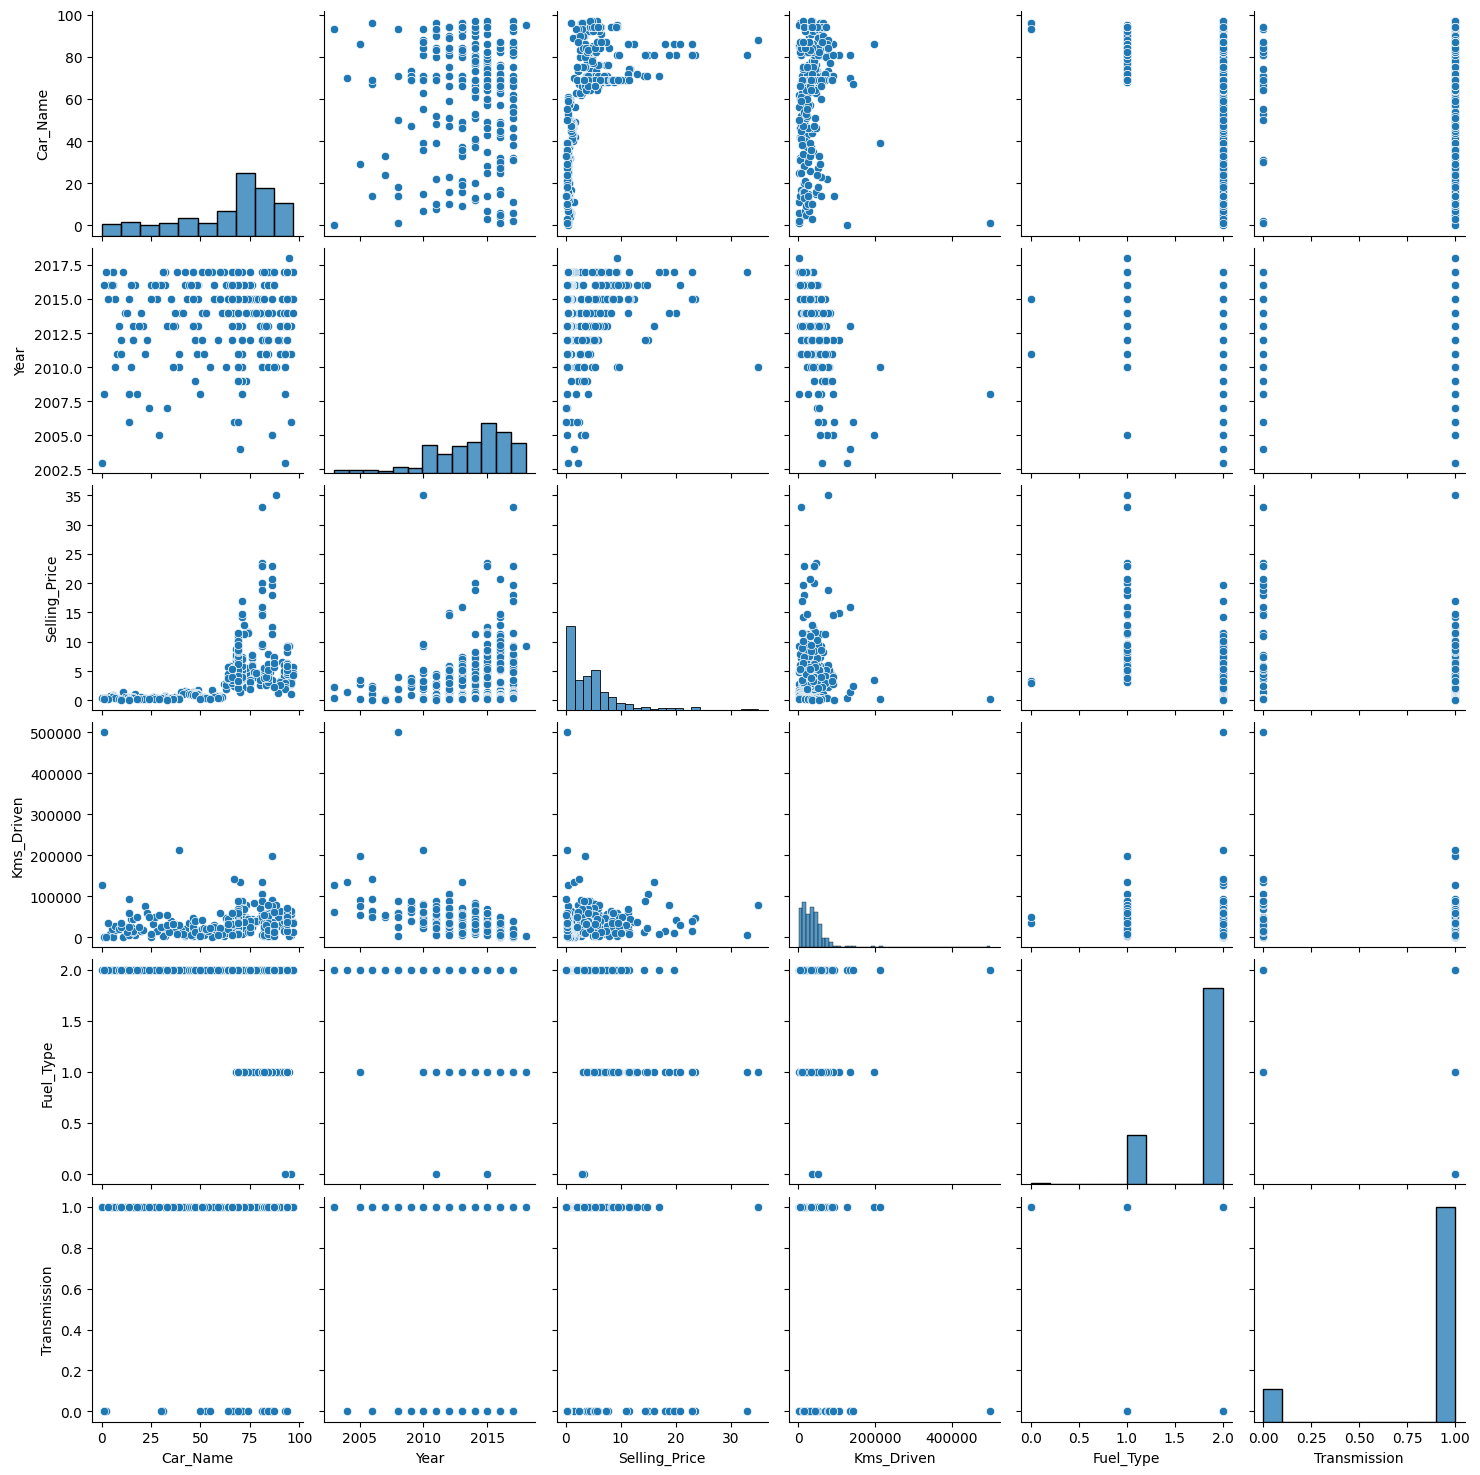

In [13]:
sns.pairplot(new)
plt.show()

In [14]:
X=new.drop(columns=['Selling_Price'])
y=new['Selling_Price']

In [15]:
X.shape,y.shape

((301, 5), (301,))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_train.info,X_test.info,y_train.info,y_test.info

((240, 5),
 (61, 5),
 (240,),
 (61,),
 <bound method DataFrame.info of      Car_Name  Year  Kms_Driven  Fuel_Type  Transmission
 184        14  2008       26000          2             1
 132         6  2017        3500          2             1
 194        18  2008       50000          2             1
 75         78  2015       36000          2             1
 111        48  2016        8700          2             1
 ..        ...   ...         ...        ...           ...
 188        21  2013       18000          2             1
 71         71  2011       45000          1             1
 106        40  2014       16500          2             1
 270        69  2011       69341          2             1
 102        42  2017        4000          2             1
 
 [240 rows x 5 columns]>,
 <bound method DataFrame.info of      Car_Name  Year  Kms_Driven  Fuel_Type  Transmission
 177        30  2016       24000          2             0
 289        69  2016       10980          2             1


In [85]:
#import and fit the data
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
#encoder =OneHotEncoder(handle_unknown= 'ignore')
#X_train_encoded=encoder.fit_transform(X_train)
#X_test_encoded=encoder.transform(X_test)
model=RandomForestRegressor(max_depth=15)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15)

In [83]:
y_pred=model.predict(X_test)

In [89]:
y_test,y_pred

(177     0.35
 289    10.11
 228     4.95
 198     0.15
 60      6.95
        ...  
 234     5.50
 296     9.50
 281     2.10
 285     7.40
 182     0.30
 Name: Selling_Price, Length: 61, dtype: float64,
 array([ 0.43023347,  9.09567667,  5.63126667,  0.30550556,  6.2714434 ,
         7.7557289 ,  1.03327313,  0.67298333,  0.51842157,  5.99222784,
         7.98376364,  0.96152619,  7.21925   ,  0.6892    ,  5.18192346,
         4.79713769,  1.06945571, 12.41346667,  0.92768667,  0.7464    ,
         0.49913824, 10.07055556,  5.030225  ,  2.77495952,  0.34790223,
         3.04560705,  6.30332594,  3.38181667,  1.12864162,  1.10058182,
         0.47721733,  7.44676548,  0.31366909,  2.31707976,  8.45241667,
         4.10904167,  6.728     ,  3.725225  ,  5.45942221,  3.74901071,
         2.73739643,  3.41691667,  4.493875  ,  0.60935   ,  6.6044408 ,
         0.36787028,  6.14390411,  4.0216    ,  3.96486345,  3.9905    ,
         6.13931122,  1.5363    , 21.6366    , 21.9749    ,  7.414

In [57]:
from sklearn.metrics import accuracy_score

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 1.3811520502303962
R-squared Score: 0.9400426740196739


In [120]:
car_names=list(zip(car_name1,car_name2))
Fuel_Types=list(zip(Fuel_Type,Fuel_Type2))
Transmissions=list(zip(Transmission,Transmission2))
cc=car_names+Fuel_Types+Transmissions
cc

[('ritz', 90),
 ('sx4', 93),
 ('ciaz', 68),
 ('wagon r', 96),
 ('swift', 92),
 ('vitara brezza', 95),
 ('s cross', 91),
 ('alto 800', 62),
 ('ertiga', 76),
 ('dzire', 73),
 ('alto k10', 63),
 ('ignis', 85),
 ('800', 0),
 ('baleno', 65),
 ('omni', 89),
 ('fortuner', 81),
 ('innova', 86),
 ('corolla altis', 71),
 ('etios cross', 77),
 ('etios g', 78),
 ('etios liva', 80),
 ('corolla', 70),
 ('etios gd', 79),
 ('camry', 67),
 ('land cruiser', 88),
 ('Royal Enfield Thunder 500', 49),
 ('UM Renegade Mojave', 56),
 ('KTM RC200', 42),
 ('Bajaj Dominar 400', 11),
 ('Royal Enfield Classic 350', 46),
 ('KTM RC390', 43),
 ('Hyosung GT250R', 40),
 ('Royal Enfield Thunder 350', 48),
 ('KTM 390 Duke ', 41),
 ('Mahindra Mojo XT300', 44),
 ('Bajaj Pulsar RS200', 17),
 ('Royal Enfield Bullet 350', 45),
 ('Royal Enfield Classic 500', 47),
 ('Bajaj Avenger 220', 6),
 ('Bajaj Avenger 150', 4),
 ('Honda CB Hornet 160R', 32),
 ('Yamaha FZ S V 2.0', 60),
 ('Yamaha FZ 16', 58),
 ('TVS Apache RTR 160', 51),
 (

In [129]:
def evaluate(model,Car_Name,Year,Kms_Driven,Fuel_Type,Transmission):
  new_data=pd.DataFrame({'Car_Name':[Car_Name],'Year':[Year],'Kms_Driven':[Kms_Driven],'Fuel_Type':[Fuel_Type],'Transmission':[Transmission]})
  #print(new_data)
  pred=model.predict(new_data)
  return pred
def data(name):
  for i in range(len(cc)):
    if cc[i][0]==name:
      return cc[i][1]

eval=evaluate(model, data('sx4')  ,	2013,		43000	,data('Diesel')  ,data('Manual')  )
upper=eval+(eval*0.15)
lower=eval-(eval*0.15)
print('prediction_price is in the range of :' ,lower, 'to' ,upper)


prediction_price is in the range of : [4.022625] to [5.442375]


In [ ]:
4.75